## Feature extraction

https://www.analyticsvidhya.com/blog/2019/08/3-techniques-extract-features-from-image-data-machine-learning-python/?utm_source=blog&utm_medium=understand-math-HOG-feature-descriptor

Method #1 for Feature Extraction from Image Data: Grayscale Pixel Values as Features
Method #2 for Feature Extraction from Image Data: Mean Pixel Value of Channels
Method #3 for Feature Extraction from Image Data: Extracting Edges

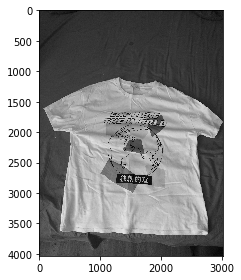

In [2]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.io import imread, imshow

image = imread('images_original/00003aeb-ace5-43bf-9a0c-dc31a03e9cd2.jpg', as_gray=True)
imshow(image)

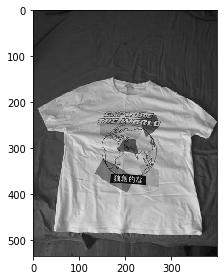

In [3]:
image = imread('images_compressed/00003aeb-ace5-43bf-9a0c-dc31a03e9cd2.jpg', as_gray=True)
imshow(image)

In [4]:
image.shape, image

((534, 400),
 array([[0.14560392, 0.14952549, 0.14952549, ..., 0.13943451, 0.13159137,
         0.1276698 ],
        [0.14952549, 0.14952549, 0.14952549, ..., 0.13159137, 0.1276698 ,
         0.12374824],
        [0.14952549, 0.14952549, 0.14952549, ..., 0.13551294, 0.13551294,
         0.13159137],
        ...,
        [0.27261098, 0.28045412, 0.27653255, ..., 0.04921569, 0.04921569,
         0.04921569],
        [0.26868941, 0.28045412, 0.27653255, ..., 0.05313725, 0.05313725,
         0.05313725],
        [0.26476784, 0.28045412, 0.28437569, ..., 0.04921569, 0.04921569,
         0.04921569]]))

In [5]:
features = np.reshape(image, (534*400))
features.shape, features

((213600,),
 array([0.14560392, 0.14952549, 0.14952549, ..., 0.04921569, 0.04921569,
        0.04921569]))

In [6]:
# again with color this time
image = imread('images_compressed/00003aeb-ace5-43bf-9a0c-dc31a03e9cd2.jpg')
image.shape

(534, 400, 3)

In [7]:
feature_matrix = np.zeros((534,400))
feature_matrix.shape

(534, 400)

In [9]:
for i in range(0,image.shape[0]):
    for j in range(0,image.shape[1]):
        feature_matrix[i][j] = ((int(image[i,j,0]) + int(image[i,j,1]) + int(image[i,j,2]))/3)
features = np.reshape(feature_matrix, (534*400))
features.shape

(213600,)

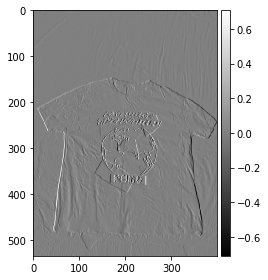

In [11]:
from skimage.filters import prewitt_h,prewitt_v
image = imread('images_compressed/00003aeb-ace5-43bf-9a0c-dc31a03e9cd2.jpg', as_gray=True)
edges_prewitt_horizontal = prewitt_h(image)
edges_prewitt_vertical = prewitt_v(image)
imshow(edges_prewitt_vertical, cmap='gray')

## resizing images

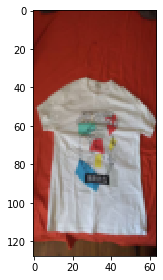

In [22]:
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure

image = imread('images_compressed/00003aeb-ace5-43bf-9a0c-dc31a03e9cd2.jpg')
resized_image = resize(image, (128, 64))
imshow(resized_image)

In [13]:
image.shape

(534, 400)

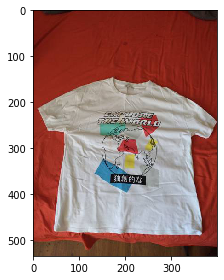

In [23]:
imshow(image)

## Feature discriptor - It is a simplified representation of the image that contains only the most important information about the image.

Most popular

HOG: Histogram of Oriented Gradients
SIFT: Scale Invariant Feature Transform
SURF: Speeded-Up Robust Feature

## HOG feature desciptor 
https://www.analyticsvidhya.com/blog/2019/09/feature-engineering-images-introduction-hog-feature-descriptor/?utm_source=blog&utm_medium=3-techniques-extract-features-from-image-data-machine-learning

In [24]:
fd, hog_image = hog(resized_image, orientations=9, pixels_per_cell=(8, 8), 
                    cells_per_block=(2, 2), visualize=True, multichannel=True)

In [25]:
fd.shape

(3780,)

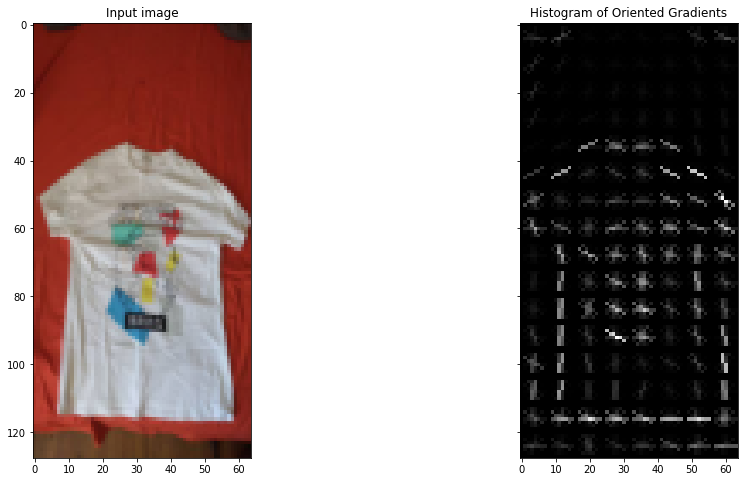

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True) 

ax1.imshow(resized_image, cmap=plt.cm.gray) 
ax1.set_title('Input image') 

# Rescale histogram for better display 
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10)) 

ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray) 
ax2.set_title('Histogram of Oriented Gradients')

plt.show()